Analysis of the world's billionaires




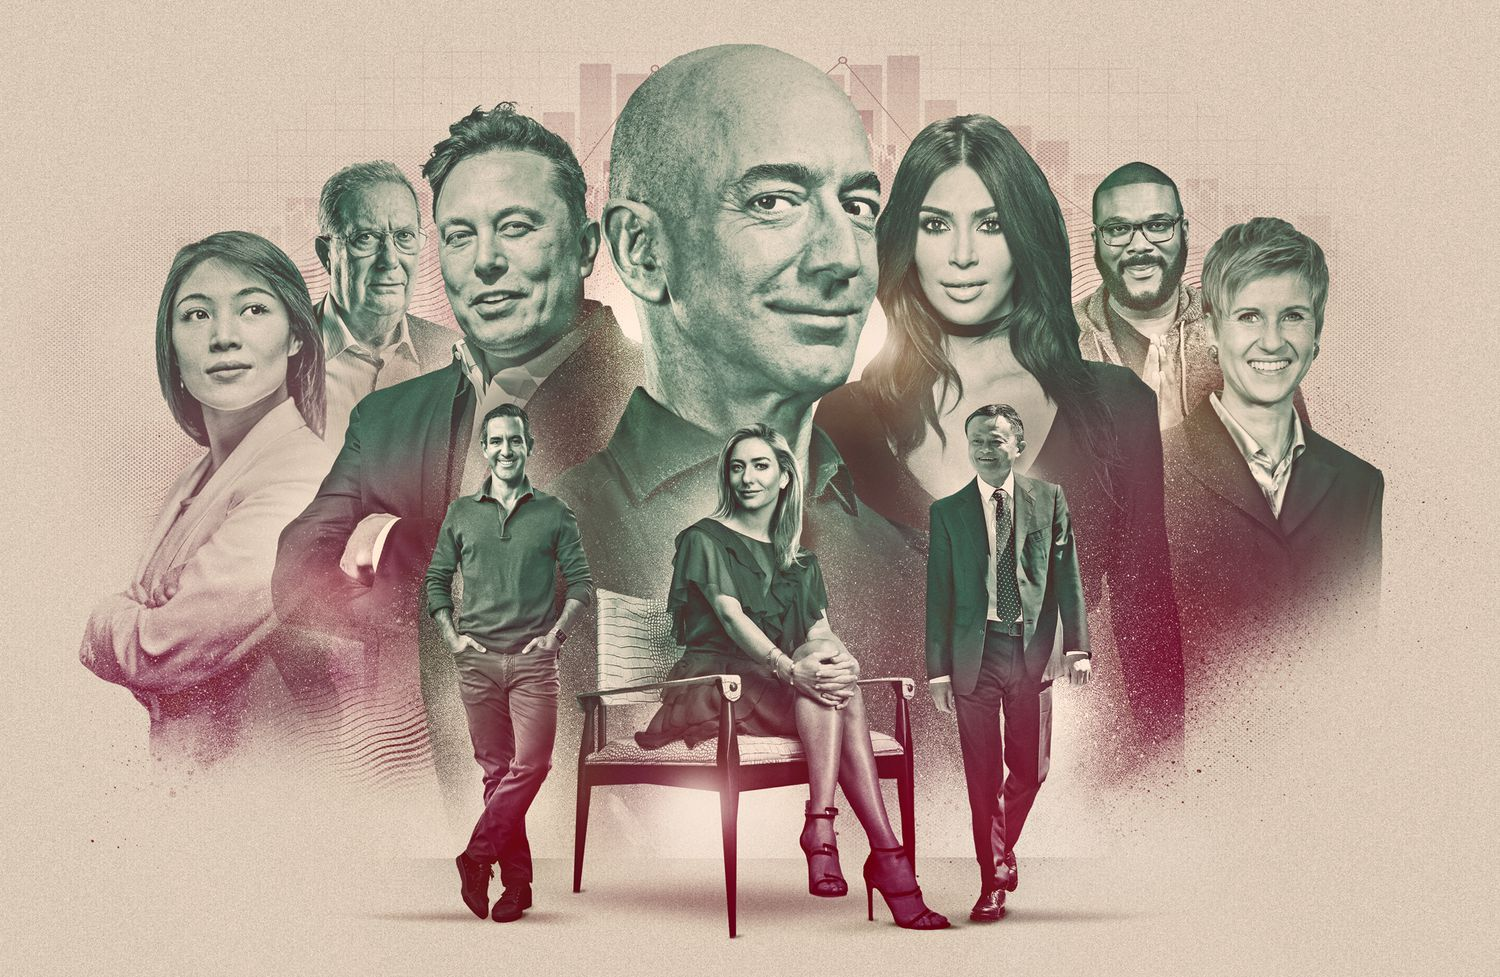

preprocessing

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
data=pd.read_csv('Billionaire.csv')

data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


Before we start, do we see if we have null values?

In [205]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

I will delete these 79 people so that it does not create a problem in my calculations

In [206]:
data=data.dropna().reset_index()


In [207]:
data.isnull().sum()

index       0
Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Delete B and $ from NetWorth Column 

In [208]:
data['NetWorth'] = data['NetWorth'].str.strip("$")
data['NetWorth'] = data['NetWorth'].str.strip("B")
data['NetWorth'] = data['NetWorth'].astype(float)

data.head()

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Processing


In [209]:
df = data.sort_values(by=["NetWorth"] , ascending=False).head(10).reset_index()
df

,level_0,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


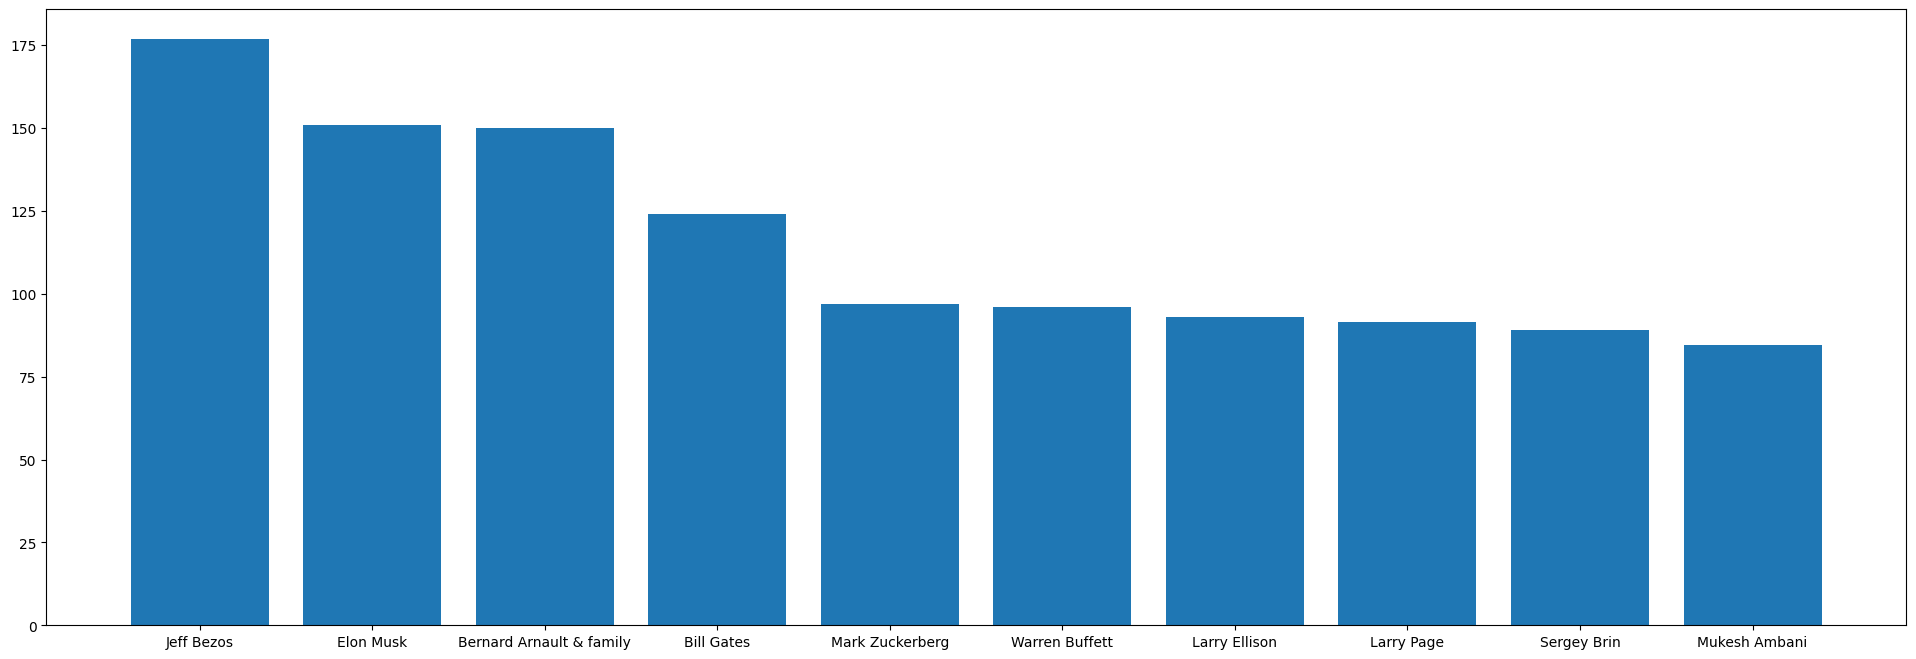

In [210]:
plt.figure(figsize=(24,8))
plt.bar(df['Name'],df['NetWorth'])
plt.show()

In [211]:
df = data['Source'].value_counts().head(10).reset_index()

df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


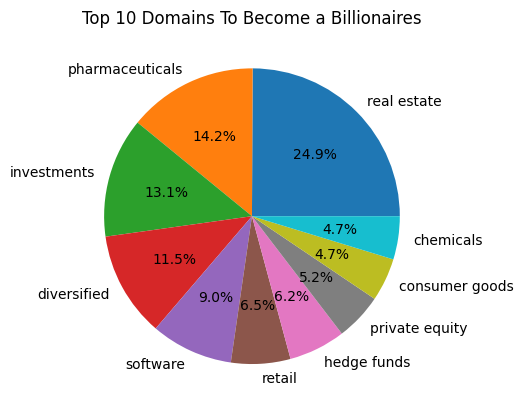

In [212]:

plt.pie(df['count'] , labels=df['Source'] , autopct='%1.1f%%')
plt.title("Top 10 Domains To Become a Billionaires")
plt.show()



In [213]:
df = data['Industry'].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


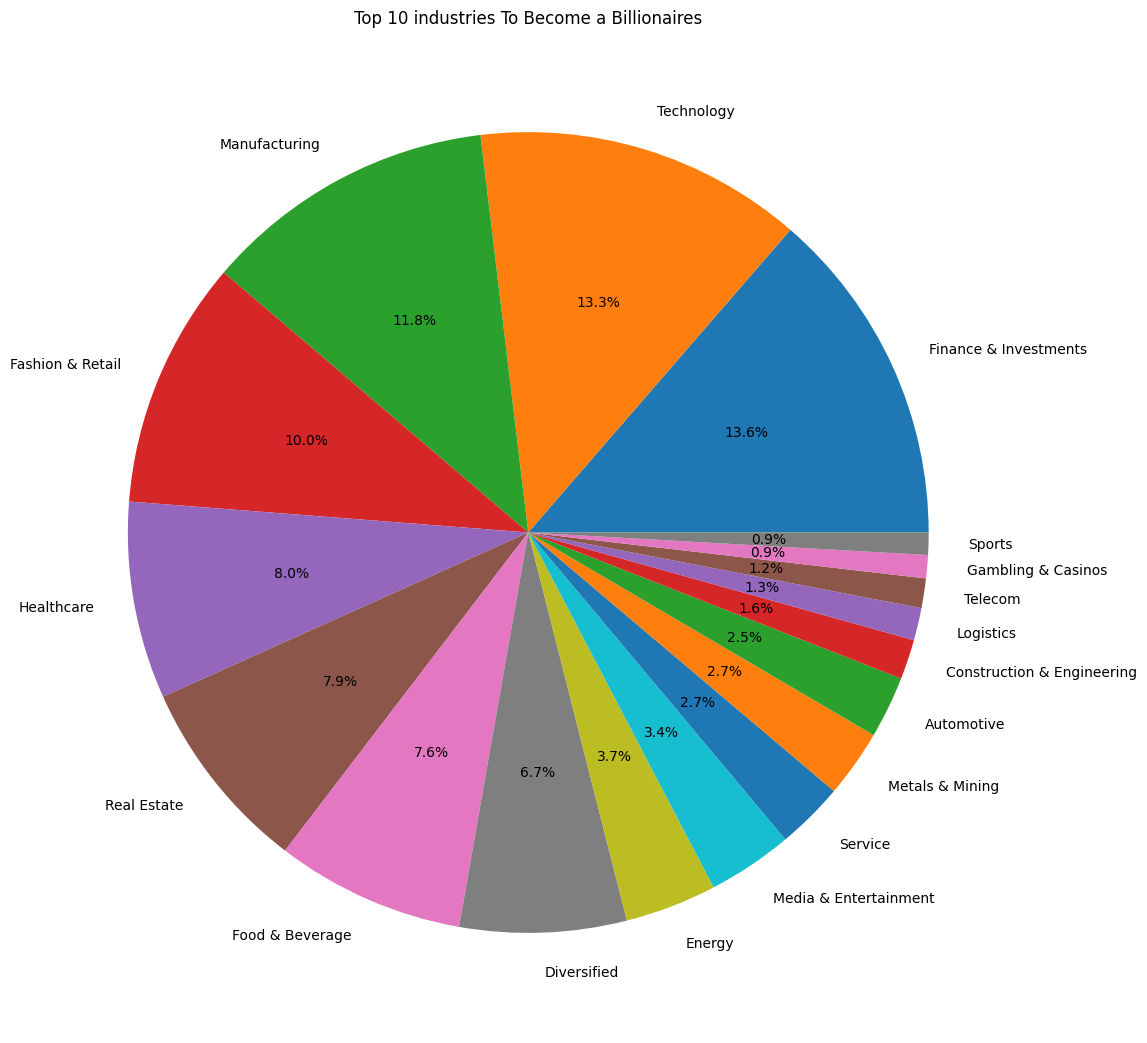

In [214]:
plt.figure(figsize=(13,13))
plt.pie(df['count'], labels=df['Industry'] , autopct='%1.1f%%')
plt.title("Top 10 industries To Become a Billionaires")
plt.show()

In [215]:
df_Countries = data['Country'].value_counts().head(10).reset_index()

df_Countries

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


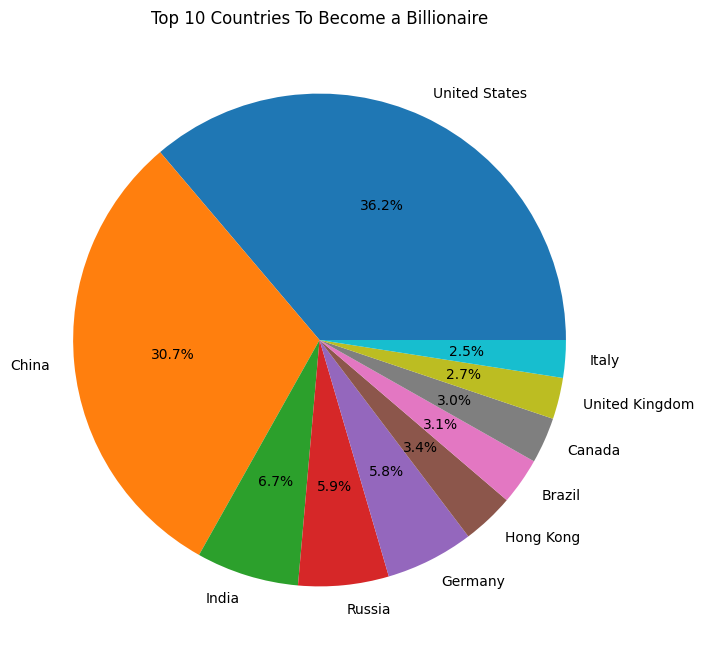

In [216]:
plt.figure(figsize=(8,8))
plt.pie(df_Countries['count'], labels=df_Countries['Country'], autopct='%1.1f%%')
plt.title("Top 10 Countries To Become a Billionaire")
plt.show()

Average and variance age of the richest people in the world



In [217]:
df_age =pd.DataFrame(data['Age'])

average = df_age.to_numpy().mean()
average

63.1136023916293

In [218]:
Variance = df_age.to_numpy().var()
Variance

180.70458328585374

The total wealth of each country



In [219]:
wealth_country = data.groupby(['Country'])['NetWorth'].sum().reset_index()

wealth_country

,Country,NetWorth
0,Algeria,4.8
1,Argentina,9.2
2,Australia,176.7
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,196.5
66,United States,4384.7
67,Venezuela,3.2
68,Vietnam,16.7


In [220]:
sort_wealth_country=wealth_country.sort_values(by =['NetWorth'] , ascending=False).reset_index()
sort_wealth_country

,index,Country,NetWorth
0,66,United States,4384.7
1,8,China,2496.1
2,50,Russia,586.0
3,18,Germany,576.6
4,24,India,567.3
...,...,...,...
65,43,Oman,2.3
66,56,St. Kitts and Nevis,1.6
67,60,Tanzania,1.6
68,69,Zimbabwe,1.5


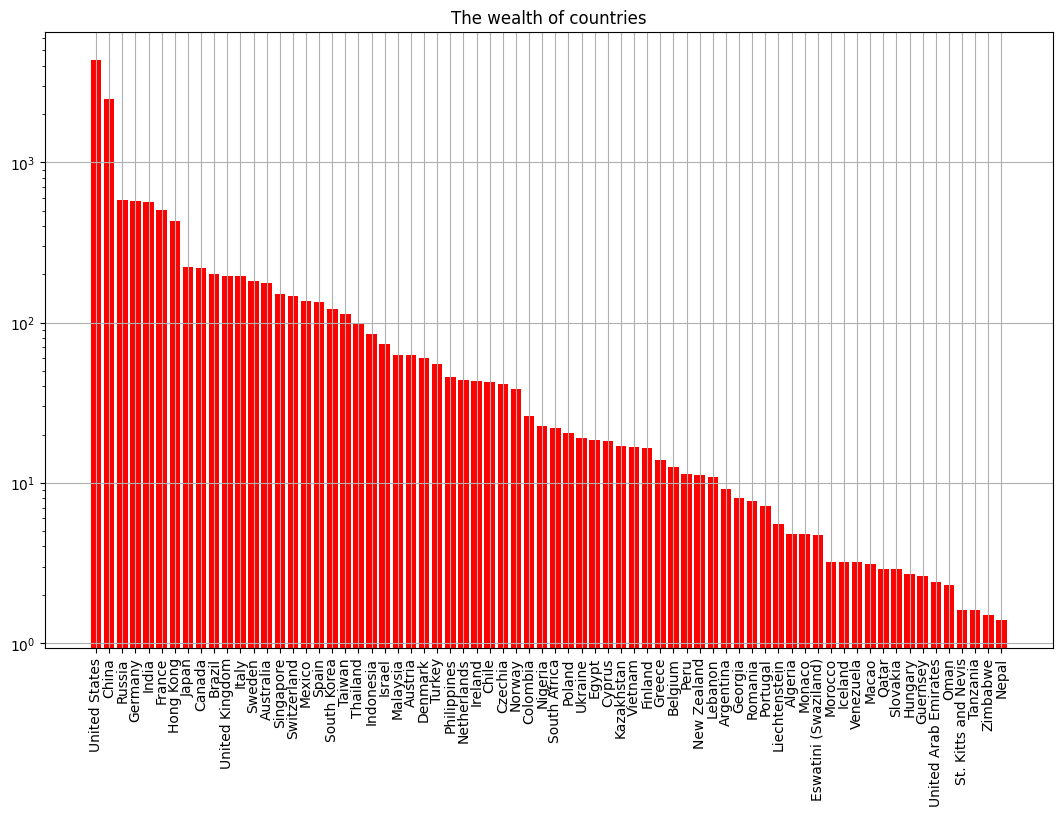

In [221]:
plt.figure(figsize=(13,8))
plt.bar(sort_wealth_country['Country'].to_numpy(dtype=(str)) , sort_wealth_country['NetWorth'].to_numpy(dtype=(float)) , color='red' , log=True )
plt.title("The wealth of countries" )

plt.xticks(rotation=90)
plt.grid()
plt.show()

The top ten richest Americans with wealth



In [222]:
df_UnitedStates = data.loc[(data['Country'] == 'United States')].head(10)

df_UnitedStates


,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
13,13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
16,16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


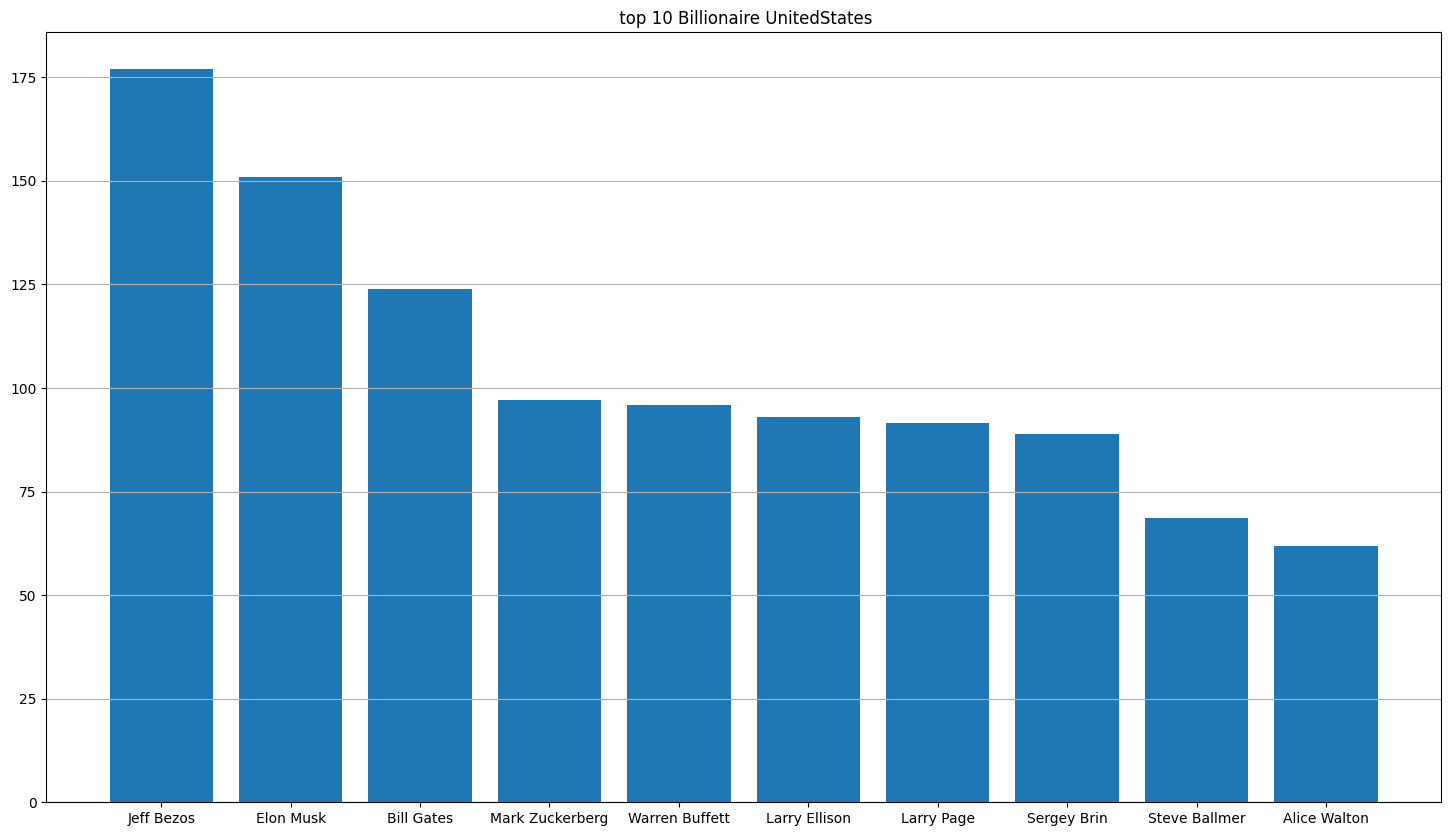

In [223]:
plt.figure(figsize=(18,10))
plt.bar(df_UnitedStates['Name'], df_UnitedStates['NetWorth'])
plt.title(" top 10 Billionaire UnitedStates")
plt.grid(axis='y')
plt.show()

The ten countries that have the least number of billionaires in the world along with the number of their billionaires on the chart

In [224]:
df_Countries_2 = data['Country'].value_counts().reset_index()
df_min_worth = df_Countries_2.sort_values( by=['count'] , ascending=True)
df_min_worth.head(10)


,Country,count
69,Nepal,1
58,Zimbabwe,1
59,St. Kitts and Nevis,1
60,Tanzania,1
61,Guernsey,1
62,Oman,1
68,Liechtenstein,1
64,Macao,1
65,Venezuela,1
66,Eswatini (Swaziland),1


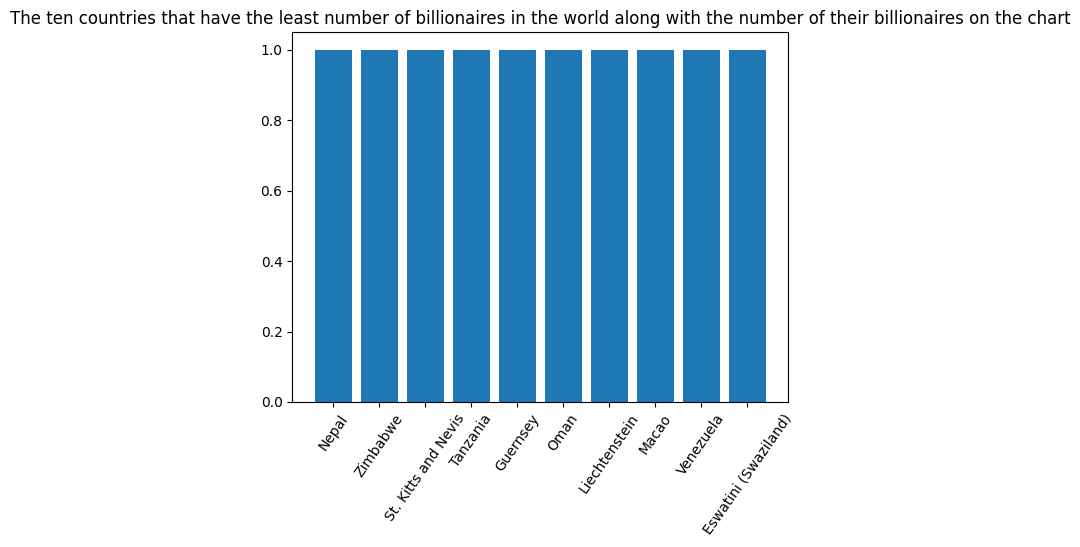

In [225]:
head_10 =df_min_worth.head(10)
plt.bar(head_10['Country'],head_10['count'])
plt.title("The ten countries that have the least number of billionaires in the world along with the number of their billionaires on the chart")
plt.xticks(rotation=55)
plt.show()

In [226]:
iran = data.loc[(data['Country'] == 'Iran')]
iran

,index,Name,NetWorth,Country,Source,Rank,Age,Industry


In response to why Iran is not seen in the list of the least number of rich people, it should be said that Iran's information is not recorded in the csv file.

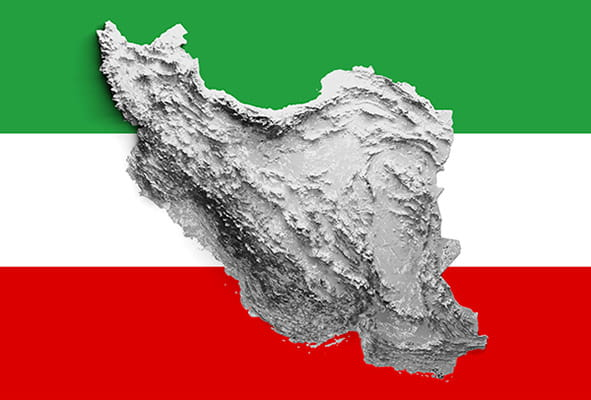